<h1 style="text-align: center;">Desafío - Dimensionalidad y Agrupación I</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo del desafío: individual
- Para la realización del desafío necesitarás apoyarte del archivo `Apoyo Desafío - Dimensionalidad y agrupación (I)`, disponible en la plataforma.

## Contexto
- Para esta actividad utilizaremos un subconjunto de 25 ítems de la International Personality Item Pool, aplicados a 2800 individuos. 
- El objetivo de esta información es desarrollar perfiles de personalidad en base a una serie de oraciones asociadas a las características de:
    - Amabilidad
    - Escrupulosidad
    - Extroversión
    - Neuroticismo
    - Apertura
    
- Los individuos deben responder qué tan adecuada es la oración respecto a su personalidad en base a 6 categorías:
    - `1`: No me representa para nada.
    - `2`: No me representa.
    - `3`: Algunas cosas no me representan.
    - `4`: Algunas cosas me representan.
    - `5`: Me representa.
    - `6`: Me representa completamente.
    
- Las 25 preguntas son:
    - `A1`: Soy indiferente a los sentimientos de otros.
    - `A2`: Me preocupo del bienestar de otros.
    - `A3`: Sé cómo confortar a otros.
    - `A4`: Me agradan los niños.
    - `A5`: Hago sentir tranquila a la gente.
    - `C1`: Soy exacto en mi trabajo.
    - `C2`: Sigo con mis tareas hasta que todo esté perfecto.
    - `C3`: Hago cosas siguiendo un plan.
    - `C4`: Hago cosas con el mínimo esfuerzo.
    - `C5`: Pierdo mi tiempo.
    - `E1`: No hablo mucho con las personas.
    - `E2`: Me es difícil acercarme a otros.
    - `E3`: Sé cómo cautivar a la gente.
    - `E4`: Hago amigos de forma fácil.
    - `E5`: Puedo tomar el cargo de las cosas.N1 Me enojo con facilidad.
    - `N2`: Me irrito con facilidad.
    - `N3`: Tengo cambios de humor frecuentes.
    - `N4`: Usualmente me siento melancólico.
    - `N5`: Entró en pánico con facilidad.
    - `O1`: Estoy lleno de ideas.
    - `O2`: Evito leer material difícil.
    - `O3`: Tiendo a llevar la conversación a niveles más altos.
    - `O4`: Dedico tiempo a la reflexión de cosas.
    - `O5`: No profundizaré sobre una materia específica.
    
- Se registraron una serie de covariables sobre características demográficas de los encuestados:
    - `gender`: Masculino = 1, Femenino = 2.
    - `education`: 1 = Educación Media Incompleta, 2 = Educación Media Completa, 3 = Educación Universitaria Incompleta, 4 = Educación Universitaria Completa, 5 = Estudios de Postgrado.
    - `age`: Edad en Años.
    
- Implementaremos un modelo de extracción factorial para identificar los principales perfiles psicológicos.

## Desafío 1: Lectura de archivos
- Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
- Importe la base de datos `bfi.csv` y asígnela a un objeto `df`.
- Solicite las primeras 5 observaciones con `head`.

In [1]:
# Utiliza esta celda para importar los módulos requeridos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import factor_analyzer as fact
import missingno as msgno

# Leemos la data
df = pd.read_csv('bfi.csv')
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


## Desafío 2: Preprocesamiento
- Elimine las columnas redundantes de la base, tal como `Unnamed: 0`.


In [2]:
# Utiliza esta celda para eliminar Unnamed: 0
df = df.drop(columns='Unnamed: 0')

- Analice el patrón de datos perdidos con `missingno`.

<AxesSubplot:>

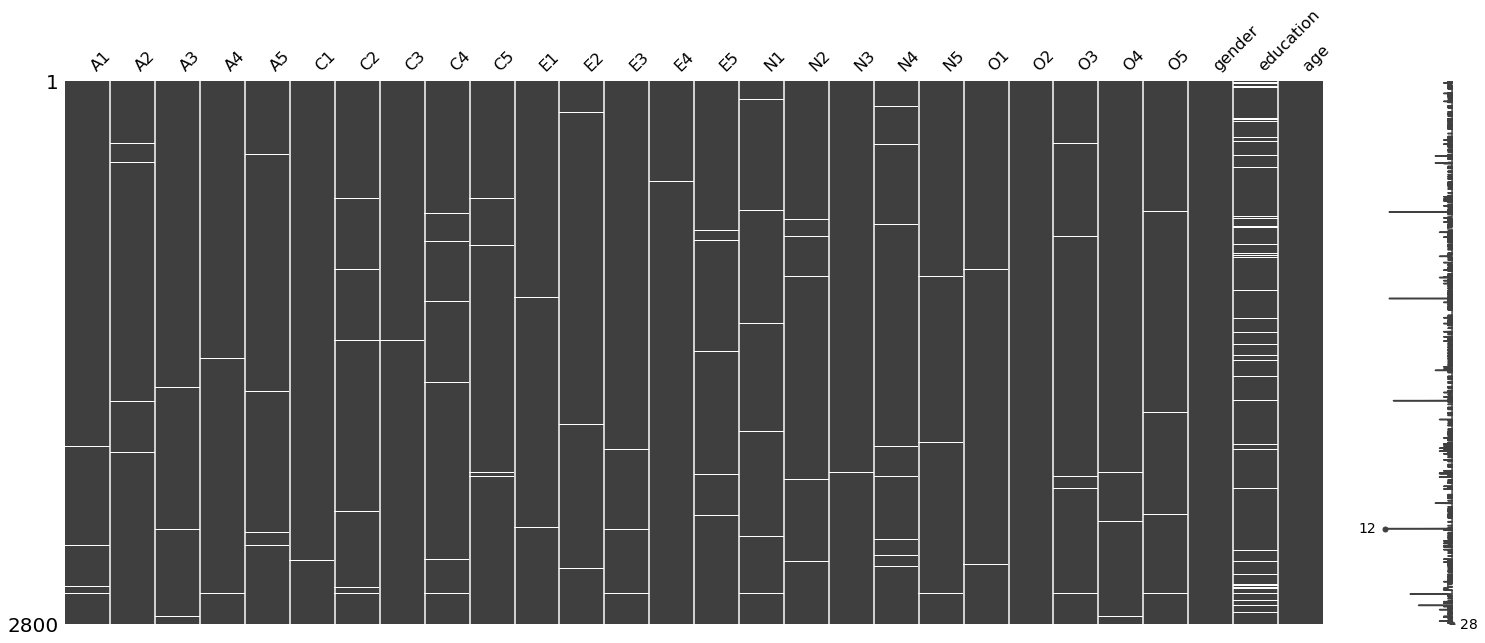

In [3]:
# Utiliza esta celda para explorar los datos perdidos
msgno.matrix(df)

- Comente cuáles son las principales variables con mayores tasas de valores perdidos.

**Respuesta:** se ve que hay una variable en particular que presenta mas datos NaN que el resto, la cual es `education`. En cuanto a la distribución de los datos perdidos, no hay ningún patron observable de datos nulos. Para ver mejor la cantidad y la proporcion de valores nulos en la data, se creará la siguiente función que infomre por cada variable, el numero total de NaN y el procentaje correspondiente de estos. 

In [4]:
def porcentaje_null(data):  
    """
        Objetivo:
            - Obtener cantidad de valores nulos y su correspondiente porcentaje dentro del dataframe 
        Parámetros:
            - data (Dataframe): Dataframe con las variables que se desean ver los porcentajes de nulos

        Retorno:
           - (print) variables con cantidades y porcentajes de nulos
    """

    count_null=data.isna().sum()
    N = data.shape[0]
    v_porcentaje=[]
    for num in count_null:
        por=round(num/N, 4) 
        v_porcentaje.append(por)
    tabla_null=pd.DataFrame({'N_NaN':count_null, 'Porcentaje':v_porcentaje})
    print(tabla_null.sort_values(by = 'Porcentaje', ascending=False))

porcentaje_null(df)

           N_NaN  Porcentaje
education    223      0.0796
N4            36      0.0129
N5            29      0.0104
O3            28      0.0100
A2            27      0.0096
A3            26      0.0093
C4            26      0.0093
E3            25      0.0089
C2            24      0.0086
E1            23      0.0082
O1            22      0.0079
N1            22      0.0079
N2            21      0.0075
E5            21      0.0075
C1            21      0.0075
C3            20      0.0071
O5            20      0.0071
A4            19      0.0068
A1            16      0.0057
E2            16      0.0057
C5            16      0.0057
A5            16      0.0057
O4            14      0.0050
N3            11      0.0039
E4             9      0.0032
O2             0      0.0000
gender         0      0.0000
age            0      0.0000


Como mencionamos, la variable education es la que presenta mas datos perdidos con un 7,96% de estos, mientras que las demas poseen menos del 1,3% de datos null. Por último, en terminos de porcentaje, prácticamente las variables presentan muy poco datos perdidos, por lo que se limpiarán estas filas de datos con nulos: 

- Genere un nuevo objeto donde almacenará la base sin valores perdidos.

In [5]:
# Utiliza esta celda para almacenar el set sin datos perdidos.
df = df.dropna().reset_index(drop=True)
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,2.0,3.0,4.0,3,5.0,6.0,1.0,2,3.0,21
1,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,4.0,3.0,2,4.0,5.0,3.0,1,2.0,19
2,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,2.0,3.0,5.0,3,5.0,6.0,3.0,1,1.0,21
3,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,2.0,3.0,5.0,2,5.0,5.0,5.0,1,1.0,17
4,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,6.0,1,5.0,5.0,2.0,1,5.0,68


## Desafío 3: Descripción
- Separe en un nuevo objeto `DataFrame` la batería de preguntas a extraer.

In [6]:
# Utiliza esta celda para generar el subset a partir del set sin datos perdidos. Tip: Puedes usar slice de la forma A1:O5
# Como la bateria de preguntas estan en order del A1 al O5, simplemente se traerán las pregunta en estos límites

df_preguntas = df.loc[:, 'A1':'O5']
df_preguntas.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,3.0,5.0,2.0,2.0,3.0,4.0,3,5.0,6.0,1.0
1,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,3.0,2.0,6.0,4.0,3.0,2,4.0,5.0,3.0
2,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,3.0,3.0,4.0,2.0,3.0,5.0,3,5.0,6.0,3.0
3,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,2.0,4.0,2.0,2.0,3.0,5.0,2,5.0,5.0,5.0
4,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,2.0,2.0,2.0,6.0,1,5.0,5.0,2.0


- Reporte las medias para cada una de las preguntas de la batería. Esto lo puede lograr con un dotplot.

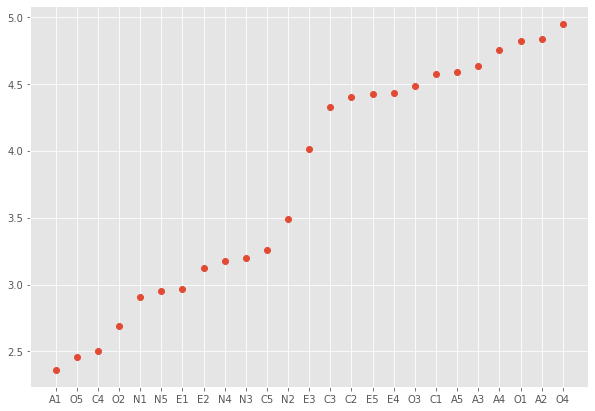

In [7]:
# Utiliza esta celda para generar el plot solicitado. Tip: Puedes aplicar mean() al df completo y ordenar sus valores
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
plt.plot(df_preguntas.mean().sort_values(), 'o')

- Genere una matriz de correlaciones con este nuevo objeto. Visualízalo con heatmap.

<AxesSubplot:>

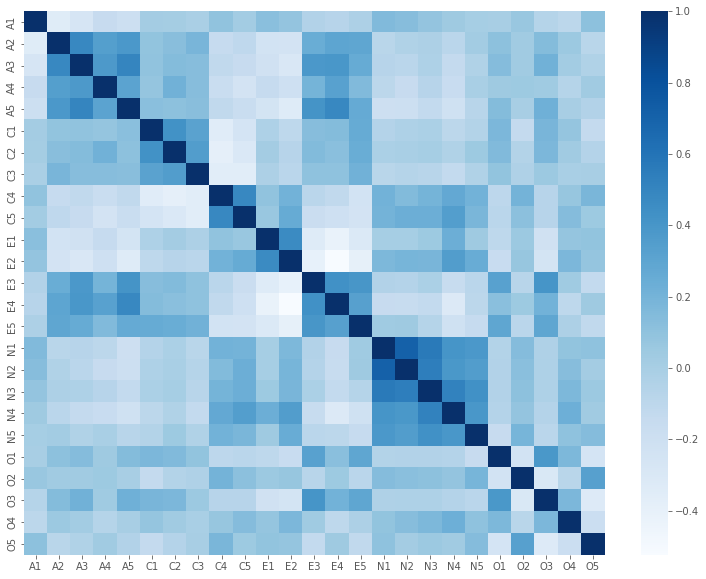

In [8]:
# Utiliza esta celda para generar el heatmap solicitado
plt.figure(figsize=(13,10))
sns.heatmap(df_preguntas.corr(), cmap='Blues')

- Comente sobre los principales patrones de correlación entre las preguntas de la batería.

**Respuesta:** podemos ver pequeños cuadrados mas oscuros que el resto, el cual, presentarian una alta correlacion.

- Para las variables N1, N2, N3, N4 y N5 se ve como entre ellas presentan una correlacion ya que se ve como ese cuadro esta mas oscuro que el resto.
- Para las variables A2, A3, A4 y A5 tambien vemos como se forma un pequeño cuadrado mucho más oscuro que el resto, revelando que estas variables estan correlacionadas entre si.
- Para C1, C2 y C3 nuevamente vemos como estas variables se ve una correlacion ya que se ven como hay ciertos cuadrado más oscuros.
- E2, E3 y E4 también podemos ver un recuadro más oscuro que el resto

Para ver mejor, se graficará solo aquellas variables que presenten una correlación mayor a 0.6 a modo de ejemplo:

<AxesSubplot:>

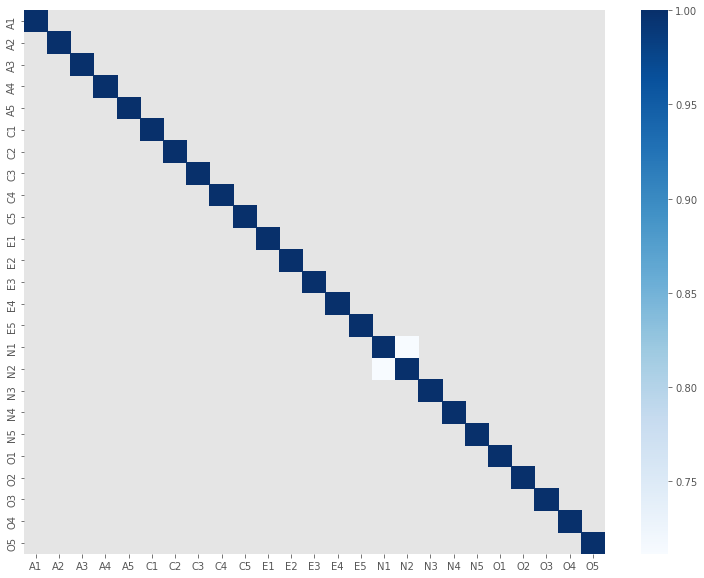

In [9]:
plt.figure(figsize=(13,10))
sns.heatmap(df_preguntas.corr()[abs(df_preguntas.corr())>.6], cmap='Blues')

Como vemos, solo las variables N1 y N2 presentan una alta correlacion, ya que esta es mayor a 0.6 en terminos de magnitud, las demas no logran pasar este umbral.

## Desafío 4: Extracción de factores
- Antes de iniciar la extracción de factores, inspeccione la idoneidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esfericidad de Barlett y Kaiser-Meyer-Olkin.

In [10]:
# Utiliza esta celda para realizar la prueba de esferacidad de Barlett

estadistico_corte, pvalor = fact.calculate_bartlett_sphericity(df_preguntas)
assert pvalor < 0.05

In [11]:
# Utiliza esta celda para realizar la prueba KMO

kmos_individuales, kmo_general = fact.calculate_kmo(df_preguntas)
assert kmo_general > 0.7

In [12]:
# Mostramos las correlaciones general e individual:

print(f'KMO General: {kmo_general}')
print(f'KMO individual: {kmos_individuales}')

KMO General: 0.8469455121781347
KMO individual: [0.73800513 0.83438706 0.87168092 0.87052456 0.90069876 0.8382246
 0.78856879 0.84957782 0.82377583 0.86199417 0.84163355 0.88398702
 0.89315613 0.87828221 0.89412711 0.77828122 0.77860688 0.86016659
 0.88634504 0.86060353 0.85512269 0.78396215 0.83386785 0.78127086
 0.75821282]


**Comentarios**

- Para el test de esfericidad de barlett nos dio un p-valor menor a 0.05, por lo que contamos con evidencia suficiente para rechazar la hipótesis nula, por lo que podemos decir que la matriz de correlaciones de las variables, no es una matriz de identidad, lo que nos indica que efectivamente tenemos correlacion entre las variables por lo que, a priori, hay material para realizar analisis factorial.
- Para los KMO, se hicieron ambas pruebas donde para el KMO general e individul nos arrojo que son mayores a 0.7 por lo que estamos en condiciones de poder realizar el análisis factorial.

Por lo que seguimos

- Instancie un objeto con `FactorAnalyzer()` donde se estimen 10 dimensiones latentes y no se aplique rotación.
- Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.

In [13]:
# Utiliza esta celda para generar los factores latentes y graficar sus valores propios

analyzer = fact.FactorAnalyzer(n_factors=10, rotation=None)
analyzer.fit(df_preguntas)

FactorAnalyzer(n_factors=10, rotation=None, rotation_kwargs={})

In [14]:
valores_propios = analyzer.get_eigenvalues()[0]
valores_propios

array([5.06851622, 2.7624793 , 2.152623  , 1.89233295, 1.51753291,
       1.07882932, 0.83090573, 0.80450025, 0.7140883 , 0.7015381 ,
       0.6808421 , 0.64897347, 0.63125633, 0.58803197, 0.5659652 ,
       0.54483958, 0.51993349, 0.49386855, 0.48273618, 0.44250032,
       0.42887063, 0.40709741, 0.38887531, 0.38476259, 0.2681008 ])

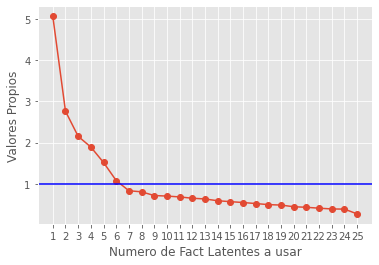

In [15]:
plt.plot(
    range(1, len(valores_propios)+1),
    valores_propios,
    'o-')
plt.axhline(1, color='blue')
plt.xticks(range(1, len(valores_propios)+1))

plt.xlabel("Numero de Fact Latentes a usar")
plt.ylabel("Valores Propios");

en base a la literatura, siempre debemos quedarnos con el numero de factores latentes donde el valor propio asociado sea mayor a 1, en este caso, nos quedaremos con 6 factores latentes ya que con el 7mo, el valor propio está por debajo del valor 1.

- Refactoriza el objeto con `FactorAnalyzer()` para incluir la cantidad de dimensiones válidas que informó el scree plot.
- Extraiga las cargas $\lambda$ del modelo e identifique qué ítems están asociados a cada factor.

In [16]:
# Utiliza esta celda para generar los nuevos factores, extraer sus cargas

analyzer_6 = fact.FactorAnalyzer(n_factors=6, rotation=None).fit(df_preguntas)

In [17]:
# Creamos un datafrrame con las cargas de cada factor latente para la bateria de preguntas.

df_cargas = pd.DataFrame(analyzer_6.loadings_, 
             columns = [f'Factor_{i}' for i in range(1,7)],
             index = df_preguntas.columns)

In [18]:
# Ahora, solo mostratemos las que posean una mayor relacion (cargas significativas). Para esto, se tomararan solo las cargas de 0.4 hacia arriba

df_cargas[df_cargas > 0.4].fillna('-')

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6
A1,-,-,-,-,-,-
A2,0.455915,-,-,-,-,-
A3,0.522146,-,-,-,-,-
A4,-,-,-,-,-,-
A5,0.567112,-,-,-,-,-
C1,-,-,0.438554,-,-,-
C2,-,-,0.454576,-,-,-
C3,-,-,-,-,-,-
C4,-,-,-,-,-,-
C5,-,-,-,-,-,-


**Comente sobre qué significa cada factor construído**

Podemos ver que cada factor construido, tiene asociado distintas preguntas segun la carga. Por lo que podriamos darle la siguiente interpretación:

- Factor 1: asociado a las preguntas A2, A3, A5, E3, E4 y E5, por lo que podemos decir que esta factor esta muy ligado a la `simpatia y abiertos al mundo en terminos expresivos.`
- Factor 2: asociado a las preguntas N1, N2, N3, N4 y N5, por lo que podemos decir que el Factor 2 está asociado en `neuroticismo`.
- Factor 3: asociado a las preguntas C1 y C2, por lo que podríamos decir que el factor 3 tiene que ver con `escrupuloso` del indivio  a la hora de realizar una labor.
- Factor 4: asociado solo a la pregunta O5, no hay mucho que decir, solo que este factor está ligado a lo `poco propenso del un individuo en profundizat en temas muy especificos`.

Para los factores 5 y 6, no hay ninguna pregunte que esté asociado a estos factores

## Desafío 5: Modelación de factores
- Extraiga los puntajes del modelo factorial a su base de datos.
- Grafique la densidad de cada uno con `kdplot`.

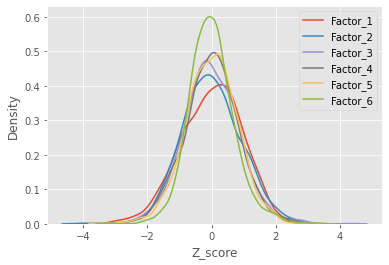

In [19]:
# Utiliza esta celda para extraer los puntajes y graficar su densidad
puntajes = analyzer_6.transform(df_preguntas)

df_puntajes = pd.DataFrame(puntajes, columns = [f'Factor_{i}' for i in range(1,7)])

# Graficamos la densidad de cada factor
for colname, serie in df_puntajes.iteritems():
    sns.kdeplot(serie, label=colname)
    
plt.legend()
plt.xlabel('Z_score');

- Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:
$$
y_i = \beta_0 + \beta_{gender} \cdot \text{gender}_i + \beta_{education} \cdot \text{education}_i + \beta_{age} \cdot \text{age}_i + \epsilon_i
$$

- $y$: Factor a modelar.

In [20]:
# Definimos nuestas variables covariables para explicar los factores
df_covariables = df[['age', 'gender', 'education']]

# Generamos el dataframe para modelar
df_modelo = pd.concat([df_puntajes, df_covariables], axis=1)

# Binarizamos el genero ya que se encuentra como 1 y 2.
df_modelo['gender'] = df_modelo['gender'].replace([1,2], [0,1])
df_modelo

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,age,gender,education
0,1.104750,0.710607,0.777228,0.429006,-0.958366,0.076417,21,1,3.0
1,-2.177680,-0.753407,0.511305,-0.211500,-0.730752,-0.523280,19,0,2.0
2,-0.015513,-0.195295,-0.403276,0.044932,-0.422234,0.065485,21,0,1.0
3,-0.273800,-0.804856,0.925968,0.354409,-1.354209,0.213480,17,0,1.0
4,0.262650,-0.660616,-1.395966,-1.336868,0.644094,-0.395139,68,0,5.0
...,...,...,...,...,...,...,...,...,...
2231,-0.160474,1.108751,-0.809948,0.678180,-1.026786,1.466266,22,1,3.0
2232,-1.788395,0.554649,1.089744,-0.299012,-0.137762,-0.517591,24,1,4.0
2233,0.606580,-0.001239,1.153887,-0.555142,-1.124612,-0.130228,29,1,4.0
2234,-0.730689,0.595617,1.072681,-0.787787,-2.041590,0.214989,31,0,4.0


In [21]:
# Utiliza esta celda para entrenar los modelos solicitados. Se debe hacer un modelo paara cada factor.
import statsmodels.formula.api as smf

modelo_factor_1 = smf.ols('Factor_1 ~ age + education + gender', data=df_modelo).fit()

modelo_factor_1.summary2().tables[1]['P>|t|'] < 0.05

Intercept     True
age           True
education    False
gender        True
Name: P>|t|, dtype: bool

In [22]:
# Utiliza esta celda para mostrar los determinantes significativos del primer modelo
import statsmodels.formula.api as smf

modelo_factor_2 = smf.ols('Factor_2 ~ age + education + gender', data=df_modelo).fit()

modelo_factor_2.summary2().tables[1]['P>|t|'] < 0.05

Intercept    False
age           True
education    False
gender        True
Name: P>|t|, dtype: bool

In [23]:
# Utiliza esta celda para mostrar los determinantes significativos del segundo modelo
import statsmodels.formula.api as smf

modelo_factor_3 = smf.ols('Factor_3 ~ age + education + gender', data=df_modelo).fit()

modelo_factor_3.summary2().tables[1]['P>|t|'] < 0.05

Intercept    False
age          False
education     True
gender        True
Name: P>|t|, dtype: bool

In [24]:
# Utiliza esta celda para mostrar los determinantes significativos del tercer modelo
import statsmodels.formula.api as smf

modelo_factor_4 = smf.ols('Factor_4 ~ age + education + gender', data=df_modelo).fit()

modelo_factor_4.summary2().tables[1]['P>|t|'] < 0.05

Intercept    False
age          False
education     True
gender        True
Name: P>|t|, dtype: bool

**Comentarios**

A modo de resumen tenemos lo siguiente:

- Para el **Factor 1**, las principales determinantes (variables significativas) serían la edad y el género.
- Para el **Factor 2**, las principales determinantes (variables significativas) serían la edad y el género. A considerar que el intercepto no es significativo para considerarlo dentro del modelo.
- Para el **Factor 3**, las principales determinantes (variables significativas) serían la educacion y el género. A considerar que el intercepto no es significativo para considerarlo dentro del modelo.
- Para el **Factor 4**, las principales determinantes (variables significativas) serían la educacion y el género. A considerar que el intercepto no es significativo para considerarlo dentro del modelo.
